<a href="https://colab.research.google.com/github/sourovkumar1688/-Fraud-Detection-ML/blob/main/E_Commerce_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [671]:
import numpy as np
import pandas as pd

In [672]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [673]:
train=pd.read_csv("gdrive/My Drive/Colab Notebooks/train-1561627878332.csv")
train_order=pd.read_csv("gdrive/My Drive/Colab Notebooks/train_order_data-1561627847149.csv")
train_merchant=pd.read_csv("gdrive/My Drive/Colab Notebooks/train_merchant_data-1561627820784.csv")

In [674]:
test=pd.read_csv("gdrive/My Drive/Colab Notebooks/test-1561627952093.csv")
test_order=pd.read_csv("gdrive/My Drive/Colab Notebooks/test_order_data-1561627931868.csv")
test_merchant=pd.read_csv("gdrive/My Drive/Colab Notebooks/test_merchant_data-1561627903902.csv")

In [675]:
ip_bound=pd.read_csv("gdrive/My Drive/Colab Notebooks/ip_boundaries_countries-1561628631121.csv")

In [676]:
train.Merchant_ID.value_counts()

264191    1
95291     1
37129     1
280057    1
119919    1
         ..
304766    1
179837    1
141145    1
167547    1
131072    1
Name: Merchant_ID, Length: 54213, dtype: int64

In [677]:
train1=pd.merge(train,train_merchant,how='outer',on='Merchant_ID')

In [678]:
train2=pd.merge(train1,train_order,how='outer',on='Merchant_ID')

In [679]:
test1 =pd.merge(test,test_merchant,how='outer',on='Merchant_ID')

In [680]:
test2=pd.merge(test1,test_order,how='outer',on='Merchant_ID')

In [681]:
train2

,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
0,221592,0,1746213,2018-07-01 06:43:23,QDZKUGCGLVPZG,F,42,157.217.17.33,149173,6641fb40fd59,2018-10-29 17:58:25,205,Direct,Credit Card
1,316935,1,1746213,2018-01-18 01:10:42,GCCLHNBNIJJGW,M,42,46.8.62.247,117942,09ce4ab420a6,2018-03-24 20:15:57,88,Ads,Cash On Delivery
2,38454,1,1746213,2018-07-16 07:56:34,DAXDXWHPMSUJG,M,19,222.110.0.90,125604,41274e2a70c0,2018-09-19 15:13:54,100,Direct,Credit Card
3,214437,1,1746213,2018-04-28 17:08:09,XPBKQAAEUPZAO,F,35,104.242.92.50,155981,e8538b380577,2018-05-27 23:24:42,60,Direct,Debit Card
4,296240,1,1746213,2018-01-09 00:26:19,VGGTRBYDZMCPN,F,27,175.104.225.24,142401,72905bb38554,2018-01-11 00:26:20,88,Ads,E-wallet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54208,243300,0,1746213,2018-07-22 14:39:10,ZBMTAPMAEKLKZ,M,22,221.89.30.218,125424,81f844b50f52,2018-08-27 07:27:23,98,Ads,Internet Banking
54209,219957,0,1746213,2018-02-20 10:55:56,ZNCFTZQBKYMWI,M,33,32.158.181.72,160844,bf8c61c4a1b8,2018-04-21 09:30:29,60,SEO,Credit Card
54210,101017,0,1746213,2018-04-12 15:14:21,MNGOIDBWMTPBU,M,29,237.66.206.59,152745,addc4c4db078,2018-07-16 05:57:39,90,SEO,Internet Banking
54211,50557,0,1746213,2018-06-02 19:21:25,QJGTWKBZDITHG,M,28,121.74.41.104,139783,4346839b51c3,2018-06-14 13:03:08,120,Ads,Debit Card


In [682]:
ip_bound.lower_bound_ip_address

0           27.116.56.0
1          58.147.128.0
2            61.5.192.0
3          91.109.216.0
4           103.5.172.0
              ...      
138841    197.157.204.0
138842    197.211.192.0
138843    197.214.120.0
138844    197.221.224.0
138845    197.231.212.0
Name: lower_bound_ip_address, Length: 138846, dtype: object

In [683]:
l1=ip_bound['lower_bound_ip_address'].apply(lambda x: str(x).split('.',4))

In [684]:
l1

0           [27, 116, 56, 0]
1          [58, 147, 128, 0]
2            [61, 5, 192, 0]
3          [91, 109, 216, 0]
4           [103, 5, 172, 0]
                 ...        
138841    [197, 157, 204, 0]
138842    [197, 211, 192, 0]
138843    [197, 214, 120, 0]
138844    [197, 221, 224, 0]
138845    [197, 231, 212, 0]
Name: lower_bound_ip_address, Length: 138846, dtype: object

In [685]:
l=[j[0]+j[1]+j[2]+j[3] for j in l1]

In [686]:
l

['27116560',
 '581471280',
 '6151920',
 '911092160',
 '10351720',
 '10351960',
 '10371040',
 '10312960',
 '10313640',
 '10314240',
 '103152380',
 '10317600',
 '103171650',
 '103171660',
 '103181600',
 '10323360',
 '103232470',
 '103281320',
 '103301360',
 '1032411560',
 '103242500',
 '1032431790',
 '1032441440',
 '1032471980',
 '1032511760',
 '1032541660',
 '1111251520',
 '1112232440',
 '117551920',
 '1171042240',
 '11959800',
 '121100480',
 '121127320',
 '1241991120',
 '1252131920',
 '175106320',
 '18094640',
 '1802221360',
 '182501760',
 '19320115164',
 '202561760',
 '20286160',
 '203174270',
 '203215320',
 '2108000',
 '21080320',
 '3122480',
 '3144640',
 '311711520',
 '31222400',
 '3726640',
 '3726800',
 '371391120',
 '46192240',
 '469900',
 '461831200',
 '46252320',
 '462551440',
 '77242160',
 '77247880',
 '79981120',
 '7910600',
 '79171480',
 '8078640',
 '80801600',
 '8090800',
 '80911120',
 '81262000',
 '82114640',
 '8420640',
 '91187960',
 '912101360',
 '912262200',
 '912302540'

In [687]:
u=ip_bound['upper_bound_ip_address'].apply(lambda x: str(x).split('.',4))

In [688]:
u

0           [27, 116, 59, 255]
1          [58, 147, 159, 255]
2            [61, 5, 207, 255]
3          [91, 109, 223, 255]
4           [103, 5, 175, 255]
                  ...         
138841    [197, 157, 207, 255]
138842    [197, 211, 255, 255]
138843    [197, 214, 127, 255]
138844    [197, 221, 255, 255]
138845    [197, 231, 215, 255]
Name: upper_bound_ip_address, Length: 138846, dtype: object

In [689]:
low1=[j[0] for j in l1]

In [690]:
low2=[j[1] for j in l1 ]

In [691]:
low3 =[j[2] for j in l1]

In [692]:
low4=[j[3] for j in l1 ]

In [693]:
ip_bound['low1']=low1

In [694]:
ip_bound['low2']=low2
ip_bound['low3']=low3
ip_bound['low4']=low4

In [695]:
u1=[j[0] for j in u]
u2=[j[1] for j in u]
u3=[j[2] for j in u]
u4=[j[3] for j in u]

In [696]:
ip_bound['up1']=u1
ip_bound['up2']=u2
ip_bound['up3']=u3
ip_bound['up4']=u4

In [697]:
ip_bound

,lower_bound_ip_address,upper_bound_ip_address,country,low1,low2,low3,low4,up1,up2,up3,up4
0,27.116.56.0,27.116.59.255,Afghanistan,27,116,56,0,27,116,59,255
1,58.147.128.0,58.147.159.255,Afghanistan,58,147,128,0,58,147,159,255
2,61.5.192.0,61.5.207.255,Afghanistan,61,5,192,0,61,5,207,255
3,91.109.216.0,91.109.223.255,Afghanistan,91,109,216,0,91,109,223,255
4,103.5.172.0,103.5.175.255,Afghanistan,103,5,172,0,103,5,175,255
...,...,...,...,...,...,...,...,...,...,...,...
138841,197.157.204.0,197.157.207.255,Zimbabwe,197,157,204,0,197,157,207,255
138842,197.211.192.0,197.211.255.255,Zimbabwe,197,211,192,0,197,211,255,255
138843,197.214.120.0,197.214.127.255,Zimbabwe,197,214,120,0,197,214,127,255
138844,197.221.224.0,197.221.255.255,Zimbabwe,197,221,224,0,197,221,255,255


In [698]:
ip_split=[]

In [699]:
ip=train2.IP_Address.apply(lambda x: x.split(".",4))

In [700]:
ip

0         [157, 217, 17, 33]
1           [46, 8, 62, 247]
2          [222, 110, 0, 90]
3         [104, 242, 92, 50]
4        [175, 104, 225, 24]
                ...         
54208     [221, 89, 30, 218]
54209     [32, 158, 181, 72]
54210     [237, 66, 206, 59]
54211     [121, 74, 41, 104]
54212    [214, 42, 147, 237]
Name: IP_Address, Length: 54213, dtype: object

In [701]:
train2.shape

(54213, 14)

In [702]:
ip_split=np.array_split(ip,20)

In [703]:
ip_split[0].shape

(2711,)

In [704]:
ip_bound

,lower_bound_ip_address,upper_bound_ip_address,country,low1,low2,low3,low4,up1,up2,up3,up4
0,27.116.56.0,27.116.59.255,Afghanistan,27,116,56,0,27,116,59,255
1,58.147.128.0,58.147.159.255,Afghanistan,58,147,128,0,58,147,159,255
2,61.5.192.0,61.5.207.255,Afghanistan,61,5,192,0,61,5,207,255
3,91.109.216.0,91.109.223.255,Afghanistan,91,109,216,0,91,109,223,255
4,103.5.172.0,103.5.175.255,Afghanistan,103,5,172,0,103,5,175,255
...,...,...,...,...,...,...,...,...,...,...,...
138841,197.157.204.0,197.157.207.255,Zimbabwe,197,157,204,0,197,157,207,255
138842,197.211.192.0,197.211.255.255,Zimbabwe,197,211,192,0,197,211,255,255
138843,197.214.120.0,197.214.127.255,Zimbabwe,197,214,120,0,197,214,127,255
138844,197.221.224.0,197.221.255.255,Zimbabwe,197,221,224,0,197,221,255,255


In [705]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Merchant_ID                 54213 non-null  int64 
 1   Fraudster                   54213 non-null  int64 
 2   Ecommerce_Provider_ID       54213 non-null  int64 
 3   Merchant_Registration_Date  54213 non-null  object
 4   Registered_Device_ID        54213 non-null  object
 5   Gender                      54213 non-null  object
 6   Age                         54213 non-null  int64 
 7   IP_Address                  54213 non-null  object
 8   Customer_ID                 54213 non-null  int64 
 9   Order_ID                    54213 non-null  object
 10  Date_of_Order               54213 non-null  object
 11  Order_Value_USD             54213 non-null  int64 
 12  Order_Source                54213 non-null  object
 13  Order_Payment_Method        54213 non-null  ob

In [706]:
train2.Fraudster=train2.Fraudster.astype('category')
train2.Gender=train2.Gender.astype('category')
train2.Order_Source=train2.Order_Source.astype('category')
train2.Order_Payment_Method=train2.Order_Payment_Method.astype('category')

In [707]:
#test2.Fraudster=test2.Fraudster.astype('category')
test2.Gender=test2.Gender.astype('category')
test2.Order_Source=test2.Order_Source.astype('category')
test2.Order_Payment_Method=test2.Order_Payment_Method.astype('category')

In [708]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Merchant_ID                 54213 non-null  int64   
 1   Fraudster                   54213 non-null  category
 2   Ecommerce_Provider_ID       54213 non-null  int64   
 3   Merchant_Registration_Date  54213 non-null  object  
 4   Registered_Device_ID        54213 non-null  object  
 5   Gender                      54213 non-null  category
 6   Age                         54213 non-null  int64   
 7   IP_Address                  54213 non-null  object  
 8   Customer_ID                 54213 non-null  int64   
 9   Order_ID                    54213 non-null  object  
 10  Date_of_Order               54213 non-null  object  
 11  Order_Value_USD             54213 non-null  int64   
 12  Order_Source                54213 non-null  category
 13  Order_Payment_Me

In [709]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13554 entries, 0 to 13553
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Merchant_ID                 13554 non-null  int64   
 1   Ecommerce_Provider_ID       13554 non-null  int64   
 2   Merchant_Registration_Date  13554 non-null  object  
 3   Registered_Device_ID        13554 non-null  object  
 4   Gender                      13554 non-null  category
 5   Age                         13554 non-null  int64   
 6   IP_Address                  13554 non-null  object  
 7   Customer_ID                 13554 non-null  int64   
 8   Order_ID                    13554 non-null  object  
 9   Date_of_Order               13554 non-null  object  
 10  Order_Value_USD             13554 non-null  int64   
 11  Order_Source                13554 non-null  category
 12  Order_Payment_Method        13554 non-null  category
dtypes: category(3), 

In [710]:
train2.drop('Merchant_ID',axis=1,inplace=True)

In [711]:
train2.drop('Order_ID',axis=1,inplace=True)

In [712]:
train2.drop('Ecommerce_Provider_ID',axis=1,inplace=True)

In [713]:
test2.drop('Merchant_ID',axis=1,inplace=True)
test2.drop('Order_ID',axis=1,inplace=True)
test2.drop('Ecommerce_Provider_ID',axis=1,inplace=True)

In [714]:
train2.describe(include='object')

,Merchant_Registration_Date,Registered_Device_ID,IP_Address,Date_of_Order
count,54213,54213,54213,54213
unique,54213,51291,52028,54161
top,2018-04-30 21:53:40,VGGTRBYDZMCPN,107.29.25.29,2018-07-28 07:55:27
freq,1,9,9,2


In [715]:
train2.describe(include='category')

,Fraudster,Gender,Order_Source,Order_Payment_Method
count,54213,54213,54213,54213
unique,2,2,3,5
top,0,M,SEO,Credit Card
freq,49188,31761,21884,21844


In [716]:
train2.drop('Registered_Device_ID',axis=1,inplace=True)

In [717]:
test2.drop('Registered_Device_ID',axis=1,inplace=True)

In [718]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Fraudster                   54213 non-null  category
 1   Merchant_Registration_Date  54213 non-null  object  
 2   Gender                      54213 non-null  category
 3   Age                         54213 non-null  int64   
 4   IP_Address                  54213 non-null  object  
 5   Customer_ID                 54213 non-null  int64   
 6   Date_of_Order               54213 non-null  object  
 7   Order_Value_USD             54213 non-null  int64   
 8   Order_Source                54213 non-null  category
 9   Order_Payment_Method        54213 non-null  category
dtypes: category(4), int64(3), object(3)
memory usage: 3.1+ MB


In [719]:
train2.describe(include=['object','category','int64'])

,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Customer_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
count,54213.0,54213,54213,54213.000000,54213,54213.000000,54213,54213.000000,54213,54213
unique,2.0,54213,2,NaN,52028,NaN,54161,NaN,3,5
top,0.0,2018-04-30 21:53:40,M,NaN,107.29.25.29,NaN,2018-07-28 07:55:27,NaN,SEO,Credit Card
freq,49188.0,1,31761,NaN,9,NaN,2,NaN,21884,21844
mean,NaN,NaN,NaN,33.122240,NaN,137966.285208,NaN,92.230240,NaN,NaN
std,NaN,NaN,NaN,8.630091,NaN,15563.516156,NaN,45.673263,NaN,NaN
min,NaN,NaN,NaN,18.000000,NaN,111234.000000,NaN,22.000000,NaN,NaN
25%,NaN,NaN,NaN,27.000000,NaN,124471.000000,NaN,55.000000,NaN,NaN
50%,NaN,NaN,NaN,32.000000,NaN,137864.000000,NaN,88.000000,NaN,NaN
75%,NaN,NaN,NaN,39.000000,NaN,151405.000000,NaN,122.000000,NaN,NaN


In [720]:
str(train2['Merchant_Registration_Date'][0])[17:19]

'23'

In [721]:
train2['MRD_year']=train2['Merchant_Registration_Date'].apply(lambda x: str(x)[0:4])

In [722]:
train2['MRD_month']=train2['Merchant_Registration_Date'].apply(lambda x: str(x)[5:7])

In [723]:
train2['MRD_day']=train2['Merchant_Registration_Date'].apply(lambda x: str(x)[8:10])

In [724]:
train2['MRD_hour']=train2['Merchant_Registration_Date'].apply(lambda x: str(x)[11:13])

In [725]:
train2['MRD_min']=train2['Merchant_Registration_Date'].apply(lambda x: str(x)[14:16])

In [726]:
train2['MRD_sec']=train2['Merchant_Registration_Date'].apply(lambda x: str(x)[17:19])

In [727]:
test2['MRD_year']=test2['Merchant_Registration_Date'].apply(lambda x: str(x)[0:4])

In [728]:
test2['MRD_month']=test2['Merchant_Registration_Date'].apply(lambda x: str(x)[5:7])

In [729]:
test2['MRD_day']=test2['Merchant_Registration_Date'].apply(lambda x: str(x)[8:10])

In [730]:
test2['MRD_hour']=test2['Merchant_Registration_Date'].apply(lambda x: str(x)[11:13])

In [731]:
test2['MRD_min']=test2['Merchant_Registration_Date'].apply(lambda x: str(x)[14:16])

In [732]:
test2['MRD_sec']=test2['Merchant_Registration_Date'].apply(lambda x: str(x)[17:19])

In [733]:
train2.describe(include=['object','category','int64'])

,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Customer_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,MRD_year,MRD_month,MRD_day,MRD_hour,MRD_min,MRD_sec
count,54213.0,54213,54213,54213.000000,54213,54213.000000,54213,54213.000000,54213,54213,54213,54213,54213,54213,54213,54213
unique,2.0,54213,2,NaN,52028,NaN,54161,NaN,3,5,1,8,31,24,60,60
top,0.0,2018-04-30 21:53:40,M,NaN,107.29.25.29,NaN,2018-07-28 07:55:27,NaN,SEO,Credit Card,2018,01,07,15,08,41
freq,49188.0,1,31761,NaN,9,NaN,2,NaN,21884,21844,54213,9627,2104,2401,953,999
mean,NaN,NaN,NaN,33.122240,NaN,137966.285208,NaN,92.230240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,8.630091,NaN,15563.516156,NaN,45.673263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,18.000000,NaN,111234.000000,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,27.000000,NaN,124471.000000,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,32.000000,NaN,137864.000000,NaN,88.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,39.000000,NaN,151405.000000,NaN,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [734]:
test2.describe(include=['object','category','int64'])

,Merchant_Registration_Date,Gender,Age,IP_Address,Customer_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,MRD_year,MRD_month,MRD_day,MRD_hour,MRD_min,MRD_sec
count,13554,13554,13554.000000,13554,13554.000000,13554,13554.000000,13554,13554,13554,13554,13554,13554,13554,13554
unique,13196,2,NaN,13251,NaN,13548,NaN,3,5,230,2,11,76,11,1
top,1/3/2018 10:47,M,NaN,34.85.253.200,NaN,2018-05-08 15:52:37,NaN,SEO,Credit Card,1/12,20,8,:2,,
freq,5,7937,NaN,5,NaN,2,NaN,5475,5516,129,8963,8963,1082,8355,13554
mean,NaN,NaN,33.159363,NaN,138088.510477,NaN,92.493507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,8.598567,NaN,15565.387077,NaN,45.944895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,18.000000,NaN,111252.000000,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,27.000000,NaN,124415.250000,NaN,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,33.000000,NaN,138301.500000,NaN,88.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,39.000000,NaN,151369.000000,NaN,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [735]:
train2.drop('MRD_year',axis=1,inplace=True)

In [736]:
test2.drop('MRD_year',axis=1,inplace=True)

In [737]:
(train2.Date_of_Order[0])[5:7]

'10'

In [738]:
train2['DO_year']=train2.Date_of_Order.apply(lambda x: str(x)[0:4])

In [739]:
train2['DO_month']=train2.Date_of_Order.apply(lambda x: str(x)[5:7])

In [740]:
train2['DO_day']=train2.Date_of_Order.apply(lambda x: str(x)[8:10])

In [741]:
train2['DO_hour']=train2.Date_of_Order.apply(lambda x: str(x)[11:13])

In [742]:
train2['DO_min']=train2.Date_of_Order.apply(lambda x: str(x)[14:16])

In [743]:
train2['DO_sec']=train2.Date_of_Order.apply(lambda x: str(x)[17:19])

In [744]:
##########################

In [745]:
test2['DO_year']=test2.Date_of_Order.apply(lambda x: str(x)[0:4])

In [746]:
test2['DO_month']=test2.Date_of_Order.apply(lambda x: str(x)[5:7])

In [747]:
test2['DO_day']=test2.Date_of_Order.apply(lambda x: str(x)[8:10])

In [748]:
test2['DO_hour']=test2.Date_of_Order.apply(lambda x: str(x)[11:13])

In [749]:
test2['DO_min']=test2.Date_of_Order.apply(lambda x: str(x)[14:16])

In [750]:
test2['DO_sec']=test2.Date_of_Order.apply(lambda x: str(x)[17:19])

In [751]:
test2

,Merchant_Registration_Date,Gender,Age,IP_Address,Customer_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,MRD_month,MRD_day,MRD_hour,MRD_min,MRD_sec,DO_year,DO_month,DO_day,DO_hour,DO_min,DO_sec
0,2/11/2018 20:50,F,40,134.162.124.62,157068,2018-03-09 09:09:42,60,SEO,Credit Card,20,8,0:,0,,2018,03,09,09,09,42
1,4/6/2018 13:19,M,39,152.76.98.87,112534,2018-06-13 20:11:19,28,SEO,Credit Card,01,1,:1,,,2018,06,13,20,11,19
2,1/12/2018 16:47,M,23,31.202.3.255,148774,2018-04-14 04:19:36,75,Ads,Debit Card,20,8,6:,7,,2018,04,14,04,19,36
3,2/19/2018 21:58,M,34,12.242.168.185,114528,2018-04-01 13:55:44,98,SEO,Credit Card,20,8,1:,8,,2018,04,01,13,55,44
4,5/17/2018 15:50,M,20,26.61.210.47,120940,2018-05-25 02:08:18,35,SEO,Credit Card,20,8,5:,0,,2018,05,25,02,08,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13549,4/21/2018 3:10,M,20,164.83.157.213,153457,2018-06-25 23:00:41,92,SEO,Credit Card,20,8,:1,,,2018,06,25,23,00,41
13550,6/10/2018 11:16,F,30,40.46.42.142,139271,2018-07-14 19:20:44,128,SEO,Internet Banking,20,8,1:,6,,2018,07,14,19,20,44
13551,2/27/2018 0:55,F,44,210.44.212.84,156228,2018-03-05 12:08:52,98,Direct,E-wallet,20,8,:5,,,2018,03,05,12,08,52
13552,5/20/2018 12:17,F,39,46.244.39.59,160078,2018-05-22 18:30:43,68,SEO,Debit Card,20,8,2:,7,,2018,05,22,18,30,43


In [752]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Fraudster                   54213 non-null  category
 1   Merchant_Registration_Date  54213 non-null  object  
 2   Gender                      54213 non-null  category
 3   Age                         54213 non-null  int64   
 4   IP_Address                  54213 non-null  object  
 5   Customer_ID                 54213 non-null  int64   
 6   Date_of_Order               54213 non-null  object  
 7   Order_Value_USD             54213 non-null  int64   
 8   Order_Source                54213 non-null  category
 9   Order_Payment_Method        54213 non-null  category
 10  MRD_month                   54213 non-null  object  
 11  MRD_day                     54213 non-null  object  
 12  MRD_hour                    54213 non-null  object  
 13  MRD_min         

In [753]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13554 entries, 0 to 13553
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Merchant_Registration_Date  13554 non-null  object  
 1   Gender                      13554 non-null  category
 2   Age                         13554 non-null  int64   
 3   IP_Address                  13554 non-null  object  
 4   Customer_ID                 13554 non-null  int64   
 5   Date_of_Order               13554 non-null  object  
 6   Order_Value_USD             13554 non-null  int64   
 7   Order_Source                13554 non-null  category
 8   Order_Payment_Method        13554 non-null  category
 9   MRD_month                   13554 non-null  object  
 10  MRD_day                     13554 non-null  object  
 11  MRD_hour                    13554 non-null  object  
 12  MRD_min                     13554 non-null  object  
 13  MRD_sec         

In [754]:
train2.describe(include=['object','category','int64'])

,Fraudster,Merchant_Registration_Date,Gender,Age,IP_Address,Customer_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,MRD_month,MRD_day,MRD_hour,MRD_min,MRD_sec,DO_year,DO_month,DO_day,DO_hour,DO_min,DO_sec
count,54213.0,54213,54213,54213.000000,54213,54213.000000,54213,54213.000000,54213,54213,54213,54213,54213,54213,54213,54213,54213,54213,54213,54213,54213
unique,2.0,54213,2,NaN,52028,NaN,54161,NaN,3,5,8,31,24,60,60,1,12,31,24,60,60
top,0.0,2018-04-30 21:53:40,M,NaN,107.29.25.29,NaN,2018-07-28 07:55:27,NaN,SEO,Credit Card,01,07,15,08,41,2018,07,14,03,55,44
freq,49188.0,1,31761,NaN,9,NaN,2,NaN,21884,21844,9627,2104,2401,953,999,54213,7083,1953,2359,960,998
mean,NaN,NaN,NaN,33.122240,NaN,137966.285208,NaN,92.230240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,8.630091,NaN,15563.516156,NaN,45.673263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,18.000000,NaN,111234.000000,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,27.000000,NaN,124471.000000,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,32.000000,NaN,137864.000000,NaN,88.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,39.000000,NaN,151405.000000,NaN,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [755]:
train2.drop('DO_year',axis=1,inplace=True)

In [756]:
test2.drop('DO_year',axis=1,inplace=True)

In [757]:
#train2.describe(include)

In [758]:
train2['ip1']=[j[0] for j in ip]

In [759]:
train2['ip2']=[j[1] for j in ip]

In [760]:
train2['ip3']=[j[2] for j in ip]

In [761]:
train2['ip4']=[j[3] for j in ip]

In [762]:
ip_test=test2['IP_Address'].apply(lambda x: str(x).split('.',4))

In [763]:
test2['ip1']=[j[0] for j in ip_test]

In [764]:
test2['ip2']=[j[1] for j in ip_test]

In [765]:
test2['ip3']=[j[2] for j in ip_test]

In [766]:
test2['ip4']=[j[3] for j in ip_test]

In [767]:
test2

,Merchant_Registration_Date,Gender,Age,IP_Address,Customer_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,MRD_month,MRD_day,MRD_hour,MRD_min,MRD_sec,DO_month,DO_day,DO_hour,DO_min,DO_sec,ip1,ip2,ip3,ip4
0,2/11/2018 20:50,F,40,134.162.124.62,157068,2018-03-09 09:09:42,60,SEO,Credit Card,20,8,0:,0,,03,09,09,09,42,134,162,124,62
1,4/6/2018 13:19,M,39,152.76.98.87,112534,2018-06-13 20:11:19,28,SEO,Credit Card,01,1,:1,,,06,13,20,11,19,152,76,98,87
2,1/12/2018 16:47,M,23,31.202.3.255,148774,2018-04-14 04:19:36,75,Ads,Debit Card,20,8,6:,7,,04,14,04,19,36,31,202,3,255
3,2/19/2018 21:58,M,34,12.242.168.185,114528,2018-04-01 13:55:44,98,SEO,Credit Card,20,8,1:,8,,04,01,13,55,44,12,242,168,185
4,5/17/2018 15:50,M,20,26.61.210.47,120940,2018-05-25 02:08:18,35,SEO,Credit Card,20,8,5:,0,,05,25,02,08,18,26,61,210,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13549,4/21/2018 3:10,M,20,164.83.157.213,153457,2018-06-25 23:00:41,92,SEO,Credit Card,20,8,:1,,,06,25,23,00,41,164,83,157,213
13550,6/10/2018 11:16,F,30,40.46.42.142,139271,2018-07-14 19:20:44,128,SEO,Internet Banking,20,8,1:,6,,07,14,19,20,44,40,46,42,142
13551,2/27/2018 0:55,F,44,210.44.212.84,156228,2018-03-05 12:08:52,98,Direct,E-wallet,20,8,:5,,,03,05,12,08,52,210,44,212,84
13552,5/20/2018 12:17,F,39,46.244.39.59,160078,2018-05-22 18:30:43,68,SEO,Debit Card,20,8,2:,7,,05,22,18,30,43,46,244,39,59


In [768]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Fraudster                   54213 non-null  category
 1   Merchant_Registration_Date  54213 non-null  object  
 2   Gender                      54213 non-null  category
 3   Age                         54213 non-null  int64   
 4   IP_Address                  54213 non-null  object  
 5   Customer_ID                 54213 non-null  int64   
 6   Date_of_Order               54213 non-null  object  
 7   Order_Value_USD             54213 non-null  int64   
 8   Order_Source                54213 non-null  category
 9   Order_Payment_Method        54213 non-null  category
 10  MRD_month                   54213 non-null  object  
 11  MRD_day                     54213 non-null  object  
 12  MRD_hour                    54213 non-null  object  
 13  MRD_min         

In [769]:
train2.drop('Merchant_Registration_Date',axis=1,inplace=True)

In [770]:
train2.drop('Date_of_Order',axis=1,inplace=True)

In [771]:
train2.drop('IP_Address',axis=1,inplace=True)

In [772]:
test2.drop('Merchant_Registration_Date',axis=1,inplace=True)

In [773]:
test2.drop('Date_of_Order',axis=1,inplace=True)

In [774]:
test2.drop('IP_Address',axis=1,inplace=True)

In [775]:
train2.describe(include=['object','category','int64'])

,Fraudster,Gender,Age,Customer_ID,Order_Value_USD,Order_Source,Order_Payment_Method,MRD_month,MRD_day,MRD_hour,MRD_min,MRD_sec,DO_month,DO_day,DO_hour,DO_min,DO_sec,ip1,ip2,ip3,ip4
count,54213.0,54213,54213.000000,54213.000000,54213.000000,54213,54213,54213,54213,54213,54213,54213,54213,54213,54213,54213,54213,54213,54213,54213,54213
unique,2.0,2,NaN,NaN,NaN,3,5,8,31,24,60,60,12,31,24,60,60,253,256,256,256
top,0.0,M,NaN,NaN,NaN,SEO,Credit Card,01,07,15,08,41,07,14,03,55,44,66,43,155,241
freq,49188.0,31761,NaN,NaN,NaN,21884,21844,9627,2104,2401,953,999,7083,1953,2359,960,998,276,253,271,256
mean,NaN,NaN,33.122240,137966.285208,92.230240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,8.630091,15563.516156,45.673263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,18.000000,111234.000000,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,27.000000,124471.000000,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,32.000000,137864.000000,88.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,39.000000,151405.000000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [776]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Fraudster             54213 non-null  category
 1   Gender                54213 non-null  category
 2   Age                   54213 non-null  int64   
 3   Customer_ID           54213 non-null  int64   
 4   Order_Value_USD       54213 non-null  int64   
 5   Order_Source          54213 non-null  category
 6   Order_Payment_Method  54213 non-null  category
 7   MRD_month             54213 non-null  object  
 8   MRD_day               54213 non-null  object  
 9   MRD_hour              54213 non-null  object  
 10  MRD_min               54213 non-null  object  
 11  MRD_sec               54213 non-null  object  
 12  DO_month              54213 non-null  object  
 13  DO_day                54213 non-null  object  
 14  DO_hour               54213 non-null  object  
 15  DO

In [777]:
train2.ip1=train2.ip1.astype('int64')
train2.ip2=train2.ip2.astype('int64')
train2.ip3=train2.ip3.astype('int64')
train2.ip4=train2.ip4.astype('int64')

In [778]:
test2.ip1=test2.ip1.astype('int64')
test2.ip2=test2.ip2.astype('int64')
test2.ip3=test2.ip3.astype('int64')
test2.ip4=test2.ip4.astype('int64')

In [779]:
train2.MRD_day=train2.MRD_day.astype('int64')
train2.MRD_hour=train2.MRD_hour.astype('int64')
train2.MRD_min=train2.MRD_min.astype('int64')
train2.MRD_month=train2.MRD_month.astype('int64')
train2.MRD_sec=train2.MRD_sec.astype('int64')

In [780]:
######################################################################

In [781]:
#test2.MRD_day=test2.MRD_day.astype('int64')
#test2.MRD_hour=test2.MRD_hour.astype('int64')
#test2.MRD_min=test2.MRD_min.astype('int64')
#test2.MRD_month=test2.MRD_month.astype('int64')
#test2.MRD_sec=test2.MRD_sec.astype('int64')

In [782]:
train2.DO_day=train2.DO_day.astype('int64')
train2.DO_hour=train2.DO_hour.astype('int64')
train2.DO_min=train2.DO_min.astype('int64')
train2.DO_month=train2.DO_month.astype('int64')
train2.DO_sec=train2.DO_sec.astype('int64')

In [783]:
test2.DO_day=test2.DO_day.astype('int64')
test2.DO_hour=test2.DO_hour.astype('int64')
test2.DO_min=test2.DO_min.astype('int64')
test2.DO_month=test2.DO_month.astype('int64')
test2.DO_sec=test2.DO_sec.astype('int64')

In [784]:
train2.DO_day.value_counts()

14    1953
13    1946
10    1941
8     1933
5     1927
4     1923
6     1903
3     1893
12    1888
11    1888
7     1883
9     1866
28    1796
20    1749
22    1748
15    1743
21    1720
24    1698
1     1687
16    1686
17    1686
19    1684
23    1677
25    1671
26    1652
18    1640
27    1638
30    1627
2     1624
29    1520
31    1023
Name: DO_day, dtype: int64

In [785]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Fraudster             54213 non-null  category
 1   Gender                54213 non-null  category
 2   Age                   54213 non-null  int64   
 3   Customer_ID           54213 non-null  int64   
 4   Order_Value_USD       54213 non-null  int64   
 5   Order_Source          54213 non-null  category
 6   Order_Payment_Method  54213 non-null  category
 7   MRD_month             54213 non-null  int64   
 8   MRD_day               54213 non-null  int64   
 9   MRD_hour              54213 non-null  int64   
 10  MRD_min               54213 non-null  int64   
 11  MRD_sec               54213 non-null  int64   
 12  DO_month              54213 non-null  int64   
 13  DO_day                54213 non-null  int64   
 14  DO_hour               54213 non-null  int64   
 15  DO

In [786]:
train2.drop('Customer_ID',axis=1,inplace=True)

In [787]:
test2.drop('Customer_ID',axis=1,inplace=True)

In [788]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Fraudster             54213 non-null  category
 1   Gender                54213 non-null  category
 2   Age                   54213 non-null  int64   
 3   Order_Value_USD       54213 non-null  int64   
 4   Order_Source          54213 non-null  category
 5   Order_Payment_Method  54213 non-null  category
 6   MRD_month             54213 non-null  int64   
 7   MRD_day               54213 non-null  int64   
 8   MRD_hour              54213 non-null  int64   
 9   MRD_min               54213 non-null  int64   
 10  MRD_sec               54213 non-null  int64   
 11  DO_month              54213 non-null  int64   
 12  DO_day                54213 non-null  int64   
 13  DO_hour               54213 non-null  int64   
 14  DO_min                54213 non-null  int64   
 15  DO

In [789]:
train2.describe(include=['object','category','int64'])

,Fraudster,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,MRD_month,MRD_day,MRD_hour,MRD_min,MRD_sec,DO_month,DO_day,DO_hour,DO_min,DO_sec,ip1,ip2,ip3,ip4
count,54213.0,54213,54213.000000,54213.000000,54213,54213,54213.000000,54213.000000,54213.000000,54213.000000,54213.000000,54213.000000,54213.000000,54213.000000,54213.000000,54213.000000,54213.000000,54213.000000,54213.000000,54213.000000
unique,2.0,2,NaN,NaN,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0.0,M,NaN,NaN,SEO,Credit Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,49188.0,31761,NaN,NaN,21884,21844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,33.122240,92.230240,NaN,NaN,4.153008,14.791378,11.529356,29.480733,29.525944,6.074982,15.426079,11.547212,29.399148,29.517994,127.335602,126.742460,127.466622,127.950750
std,NaN,NaN,8.630091,45.673263,NaN,NaN,2.258778,8.722575,6.924145,17.318750,17.231064,2.661109,8.753386,6.920854,17.285396,17.314979,74.303727,74.097712,73.613612,73.631888
min,NaN,NaN,18.000000,22.000000,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,27.000000,55.000000,NaN,NaN,2.000000,7.000000,6.000000,14.000000,15.000000,4.000000,8.000000,6.000000,14.000000,15.000000,64.000000,63.000000,64.000000,64.000000
50%,NaN,NaN,32.000000,88.000000,NaN,NaN,4.000000,14.000000,12.000000,30.000000,30.000000,6.000000,15.000000,12.000000,29.000000,30.000000,127.000000,126.000000,127.000000,129.000000
75%,NaN,NaN,39.000000,122.000000,NaN,NaN,6.000000,22.000000,18.000000,44.000000,44.000000,8.000000,23.000000,18.000000,44.000000,44.000000,192.000000,191.000000,192.000000,191.000000


In [790]:
test2.isnull().sum().sum()

0

In [791]:
train2.isnull().sum().sum()

0

In [792]:
train2

,Fraudster,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,MRD_month,MRD_day,MRD_hour,MRD_min,MRD_sec,DO_month,DO_day,DO_hour,DO_min,DO_sec,ip1,ip2,ip3,ip4
0,0,F,42,205,Direct,Credit Card,7,1,6,43,23,10,29,17,58,25,157,217,17,33
1,1,M,42,88,Ads,Cash On Delivery,1,18,1,10,42,3,24,20,15,57,46,8,62,247
2,1,M,19,100,Direct,Credit Card,7,16,7,56,34,9,19,15,13,54,222,110,0,90
3,1,F,35,60,Direct,Debit Card,4,28,17,8,9,5,27,23,24,42,104,242,92,50
4,1,F,27,88,Ads,E-wallet,1,9,0,26,19,1,11,0,26,20,175,104,225,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54208,0,M,22,98,Ads,Internet Banking,7,22,14,39,10,8,27,7,27,23,221,89,30,218
54209,0,M,33,60,SEO,Credit Card,2,20,10,55,56,4,21,9,30,29,32,158,181,72
54210,0,M,29,90,SEO,Internet Banking,4,12,15,14,21,7,16,5,57,39,237,66,206,59
54211,0,M,28,120,Ads,Debit Card,6,2,19,21,25,6,14,13,3,8,121,74,41,104


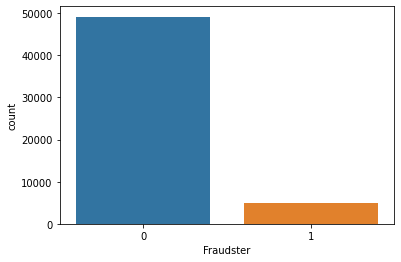

0    49188
1     5025
Name: Fraudster, dtype: int64
Percentage of fraudster Merchants: 0.0 %


In [793]:
# Plot Distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Fraudster',data=train2)
plt.show()

# What are the counts?
print(train2.Fraudster.value_counts())

# What is the percentage?
count_yes = len(train2[train2.Fraudster == '1'])
count_no = len(train2[train2.Fraudster != '1'])

percent_success = (count_yes/(count_yes + count_no))*100

print('Percentage of fraudster Merchants:', percent_success, "%")

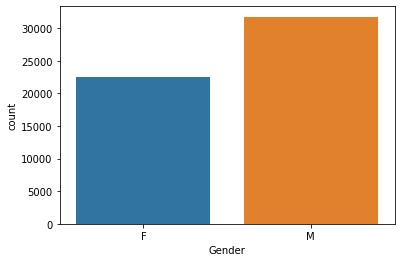

In [794]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Gender',data=train2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


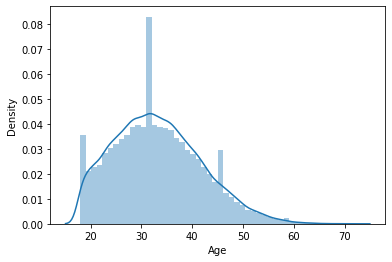

In [795]:

# Check distribution of age
%matplotlib inline
sns.distplot(train2["Age"] )

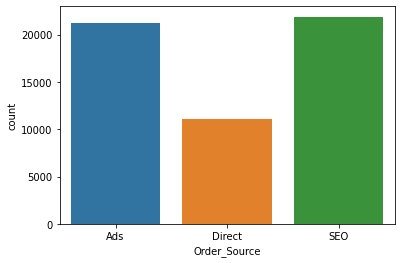

In [796]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Order_Source',data=train2)
plt.show()

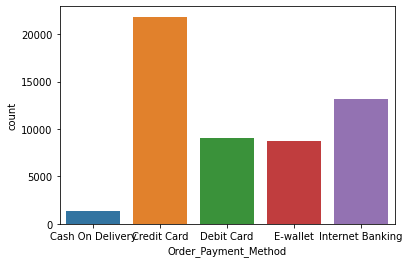

In [797]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Order_Payment_Method',data=train2)
plt.show()

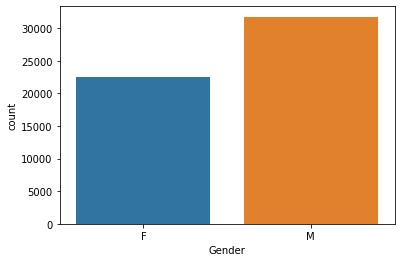

In [798]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Gender',data=train2)
plt.show()

In [799]:
cat_cols=['Order_Payment_Method','Order_Source','Gender']

In [800]:
d1=pd.get_dummies(columns=cat_cols,data=train2[cat_cols],prefix=cat_cols, prefix_sep="_",drop_first=True)

In [801]:

d1

,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Order_Source_Direct,Order_Source_SEO,Gender_M
0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,1
2,1,0,0,0,1,0,1
3,0,1,0,0,1,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
54208,0,0,0,1,0,0,1
54209,1,0,0,0,0,1,1
54210,0,0,0,1,0,1,1
54211,0,1,0,0,0,0,1


In [802]:
d2=pd.get_dummies(columns=cat_cols,data=test2[cat_cols],prefix=cat_cols, prefix_sep="_",drop_first=True)

In [803]:

d2

,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Order_Source_Direct,Order_Source_SEO,Gender_M
0,1,0,0,0,0,1,0
1,1,0,0,0,0,1,1
2,0,1,0,0,0,0,1
3,1,0,0,0,0,1,1
4,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...
13549,1,0,0,0,0,1,1
13550,0,0,0,1,0,1,0
13551,0,0,1,0,1,0,0
13552,0,1,0,0,0,1,0


In [804]:
test3=pd.concat([test2,d2],axis=1)

In [805]:
train3=pd.concat([train2,d1],axis=1)

In [806]:

train3

,Fraudster,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,MRD_month,MRD_day,MRD_hour,MRD_min,MRD_sec,DO_month,DO_day,DO_hour,DO_min,DO_sec,ip1,ip2,ip3,ip4,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Order_Source_Direct,Order_Source_SEO,Gender_M
0,0,F,42,205,Direct,Credit Card,7,1,6,43,23,10,29,17,58,25,157,217,17,33,1,0,0,0,1,0,0
1,1,M,42,88,Ads,Cash On Delivery,1,18,1,10,42,3,24,20,15,57,46,8,62,247,0,0,0,0,0,0,1
2,1,M,19,100,Direct,Credit Card,7,16,7,56,34,9,19,15,13,54,222,110,0,90,1,0,0,0,1,0,1
3,1,F,35,60,Direct,Debit Card,4,28,17,8,9,5,27,23,24,42,104,242,92,50,0,1,0,0,1,0,0
4,1,F,27,88,Ads,E-wallet,1,9,0,26,19,1,11,0,26,20,175,104,225,24,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54208,0,M,22,98,Ads,Internet Banking,7,22,14,39,10,8,27,7,27,23,221,89,30,218,0,0,0,1,0,0,1
54209,0,M,33,60,SEO,Credit Card,2,20,10,55,56,4,21,9,30,29,32,158,181,72,1,0,0,0,0,1,1
54210,0,M,29,90,SEO,Internet Banking,4,12,15,14,21,7,16,5,57,39,237,66,206,59,0,0,0,1,0,1,1
54211,0,M,28,120,Ads,Debit Card,6,2,19,21,25,6,14,13,3,8,121,74,41,104,0,1,0,0,0,0,1


In [807]:
train3.drop('Order_Source',axis=1,inplace=True)
train3.drop('Order_Payment_Method',axis=1,inplace=True)
train3.drop('Gender',axis=1,inplace=True)

In [808]:
test3.drop('Order_Source',axis=1,inplace=True)
test3.drop('Order_Payment_Method',axis=1,inplace=True)
test3.drop('Gender',axis=1,inplace=True)

In [809]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Fraudster                              54213 non-null  category
 1   Age                                    54213 non-null  int64   
 2   Order_Value_USD                        54213 non-null  int64   
 3   MRD_month                              54213 non-null  int64   
 4   MRD_day                                54213 non-null  int64   
 5   MRD_hour                               54213 non-null  int64   
 6   MRD_min                                54213 non-null  int64   
 7   MRD_sec                                54213 non-null  int64   
 8   DO_month                               54213 non-null  int64   
 9   DO_day                                 54213 non-null  int64   
 10  DO_hour                                54213 non-null  int

In [810]:
y=train3.Fraudster
x=train3
x.drop('Fraudster',axis=1,inplace=True)

In [811]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=646)


# Fit on Data
os_data_x,os_data_y = smote.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [812]:
os_data_x=pd.DataFrame(os_data_x,columns=x.columns)

In [813]:
os_data_x

,Age,Order_Value_USD,MRD_month,MRD_day,MRD_hour,MRD_min,MRD_sec,DO_month,DO_day,DO_hour,DO_min,DO_sec,ip1,ip2,ip3,ip4,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Order_Source_Direct,Order_Source_SEO,Gender_M
0,42,205,7,1,6,43,23,10,29,17,58,25,157,217,17,33,1,0,0,0,1,0,0
1,42,88,1,18,1,10,42,3,24,20,15,57,46,8,62,247,0,0,0,0,0,0,1
2,19,100,7,16,7,56,34,9,19,15,13,54,222,110,0,90,1,0,0,0,1,0,1
3,35,60,4,28,17,8,9,5,27,23,24,42,104,242,92,50,0,1,0,0,1,0,0
4,27,88,1,9,0,26,19,1,11,0,26,20,175,104,225,24,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98371,28,31,1,8,14,3,47,1,10,14,3,48,125,70,229,217,0,0,0,0,0,0,0
98372,34,47,2,23,21,36,38,4,21,8,43,7,40,143,12,52,0,0,0,0,0,1,1
98373,33,46,1,5,10,5,39,1,4,10,6,39,150,135,159,242,0,0,0,0,0,0,0
98374,34,75,2,10,18,50,25,3,15,8,28,37,207,143,40,176,0,0,0,0,0,1,0


In [814]:
os_data_y=pd.DataFrame(os_data_y,columns=['Fraudster'])

In [815]:
os_data_x.shape

(98376, 23)

In [816]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(os_data_x, os_data_y, test_size=0.20,random_state=646)

In [817]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [818]:
model1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [819]:
from sklearn.metrics import confusion_matrix, f1_score
train_pred = model1.predict(x_train)
test_pred = model1.predict(x_test)

print(model1.score(x_train, y_train))
print(model1.score(x_test, y_test))

print(confusion_matrix(y_true=y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=y_test, y_pred =  test_pred)

0.7862007623888183
0.7858304533441757
[[31756  7468]
 [ 9358 30118]]


In [820]:
f1_score(y_train,train_pred)

0.7816563286704211

In [821]:
test3

,Age,Order_Value_USD,MRD_month,MRD_day,MRD_hour,MRD_min,MRD_sec,DO_month,DO_day,DO_hour,DO_min,DO_sec,ip1,ip2,ip3,ip4,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Order_Source_Direct,Order_Source_SEO,Gender_M
0,40,60,20,8,0:,0,,3,9,9,9,42,134,162,124,62,1,0,0,0,0,1,0
1,39,28,01,1,:1,,,6,13,20,11,19,152,76,98,87,1,0,0,0,0,1,1
2,23,75,20,8,6:,7,,4,14,4,19,36,31,202,3,255,0,1,0,0,0,0,1
3,34,98,20,8,1:,8,,4,1,13,55,44,12,242,168,185,1,0,0,0,0,1,1
4,20,35,20,8,5:,0,,5,25,2,8,18,26,61,210,47,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13549,20,92,20,8,:1,,,6,25,23,0,41,164,83,157,213,1,0,0,0,0,1,1
13550,30,128,20,8,1:,6,,7,14,19,20,44,40,46,42,142,0,0,0,1,0,1,0
13551,44,98,20,8,:5,,,3,5,12,8,52,210,44,212,84,0,0,1,0,1,0,0
13552,39,68,20,8,2:,7,,5,22,18,30,43,46,244,39,59,0,1,0,0,0,1,0


In [822]:
#Test_pred=model1.predict(test3)

In [823]:
Test_pred=pd.DataFrame(Test_pred)

In [824]:
# Create Dataframe
#os_data_X = pd.DataFrame(data=os_data_X)
#os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [825]:
Test_pred['Merchant_ID']=test1.Merchant_ID

In [826]:
Test_pred1=pd.DataFrame(Test_pred1)

In [827]:

Test_pred1

,0,Merchant_ID
0,0,53637.0
1,0,243517.0
2,0,343640.0
3,0,69889.0
4,1,125706.0
...,...,...
54208,0,NaN
54209,0,NaN
54210,0,NaN
54211,0,NaN


In [828]:

Test_pred.to_csv('pred_1.csv',index=True)

In [829]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [830]:
sc.fit(x_train,y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [831]:
x_train

,Age,Order_Value_USD,MRD_month,MRD_day,MRD_hour,MRD_min,MRD_sec,DO_month,DO_day,DO_hour,DO_min,DO_sec,ip1,ip2,ip3,ip4,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Order_Source_Direct,Order_Source_SEO,Gender_M
15298,31,105,7,3,15,26,1,11,1,3,38,46,7,244,154,117,1,0,0,0,0,1,1
31092,30,22,1,10,2,55,8,1,12,2,55,9,84,183,219,28,1,0,0,0,0,0,0
73532,20,134,4,2,13,11,32,5,13,18,18,12,92,188,160,243,0,0,0,0,0,0,0
54228,37,42,8,13,10,3,38,8,19,12,9,6,41,121,27,89,0,0,0,0,1,0,0
43627,46,115,4,17,19,26,7,5,10,20,5,53,42,140,195,130,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26032,25,198,5,21,8,48,28,7,23,14,56,38,245,158,126,139,0,0,0,1,1,0,0
44992,29,210,5,22,15,54,37,8,19,0,12,21,173,31,142,93,0,1,0,0,0,1,1
40780,43,155,5,19,15,49,3,6,2,2,25,32,158,1,74,218,0,1,0,0,0,0,1
53249,23,92,1,16,19,3,29,1,29,0,20,32,129,151,136,96,1,0,0,0,1,0,1


In [832]:

std_x_train=sc.transform(x_train)

In [833]:
std_x_test=sc.transform(x_test)

In [834]:
from sklearn.metrics import confusion_matrix
train_pred = model1.predict(std_x_train)
test_pred = model1.predict(std_x_test)

print(model1.score(std_x_train, y_train))
print(model1.score(std_x_test, y_test))

print(confusion_matrix(y_true=y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=y_test, y_pred =  test_pred)

0.728284625158831
0.7147286033746697
[[26665 12559]
 [ 8825 30651]]


In [835]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4,random_state=646)

In [836]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=646, splitter='best')

In [837]:

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
cols=pd.DataFrame([x_train.columns[indices],np.sort(importances)[::-1]])

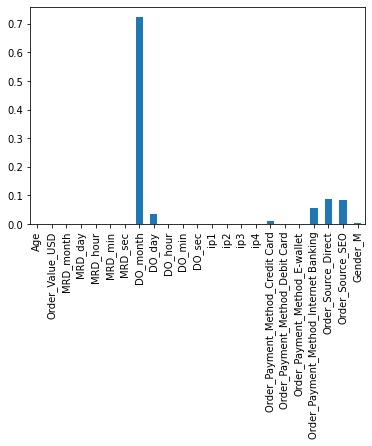

In [838]:
feat_importances = pd.Series(clf.feature_importances_, index = x_train.columns)
feat_importances.plot(kind='bar')

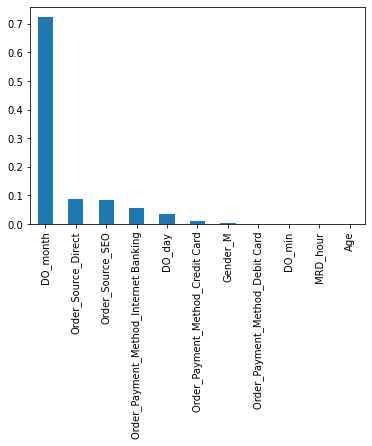

In [839]:

feat_importances_ordered = feat_importances.nlargest(11)
feat_importances_ordered.plot(kind='bar')

In [840]:
cols

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,DO_month,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Internet Banking,DO_day,Order_Payment_Method_Credit Card,Gender_M,Order_Payment_Method_Debit Card,DO_min,MRD_hour,Order_Value_USD,MRD_month,MRD_day,MRD_min,MRD_sec,DO_sec,DO_hour,ip1,ip2,ip3,ip4,Order_Payment_Method_E-wallet,Age
1,0.723895,0.0863594,0.0826481,0.0574082,0.0344604,0.0119262,0.00252367,0.000487214,0.000166804,0.000125167,0,0,0,0,0,0,0,0,0,0,0,0,0


In [841]:
cols=cols.iloc[0,0:6]

In [842]:
cols

0                                 DO_month
1                      Order_Source_Direct
2                         Order_Source_SEO
3    Order_Payment_Method_Internet Banking
4                                   DO_day
5         Order_Payment_Method_Credit Card
Name: 0, dtype: object

[Text(167.4, 195.696, 'X[7] <= 1.5\ngini = 0.5\nsamples = 78700\nvalue = [39224, 39476]'),
 Text(83.7, 152.208, 'X[8] <= 18.5\ngini = 0.052\nsamples = 21207\nvalue = [569, 20638]'),
 Text(41.85, 108.72, 'X[8] <= 15.5\ngini = 0.016\nsamples = 20684\nvalue = [172, 20512]'),
 Text(20.925, 65.232, 'X[8] <= 14.5\ngini = 0.012\nsamples = 20452\nvalue = [120, 20332]'),
 Text(10.4625, 21.744, 'gini = 0.01\nsamples = 20099\nvalue = [97, 20002]'),
 Text(31.387500000000003, 21.744, 'gini = 0.122\nsamples = 353\nvalue = [23, 330]'),
 Text(62.775000000000006, 65.232, 'X[17] <= 0.5\ngini = 0.348\nsamples = 232\nvalue = [52, 180]'),
 Text(52.3125, 21.744, 'gini = 0.32\nsamples = 225\nvalue = [45, 180]'),
 Text(73.2375, 21.744, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(125.55000000000001, 108.72, 'X[8] <= 27.5\ngini = 0.366\nsamples = 523\nvalue = [397, 126]'),
 Text(104.625, 65.232, 'X[21] <= 0.5\ngini = 0.434\nsamples = 371\nvalue = [253, 118]'),
 Text(94.16250000000001, 21.744, 'gini = 0.48

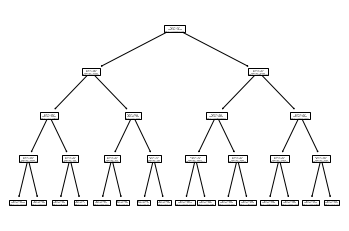

In [843]:
tree.plot_tree(clf.fit(x_train,y_train))

In [844]:

train_pred=clf.predict(x_train)

In [845]:
confusion_matrix(y_train,train_pred)

array([[27698, 11526],
       [ 5615, 33861]])

In [846]:
f1_score(y_train,train_pred)

0.7980156251841203

In [847]:
clf.predict(x_test)

array([1, 1, 1, ..., 0, 1, 1])

In [848]:
confusion_matrix(y_train,train_pred)

array([[27698, 11526],
       [ 5615, 33861]])

In [849]:
#########################################################################

In [850]:
#test_pred=clf.predict(test3)

In [851]:
test_pred=pd.DataFrame(test_pred)

In [852]:
test_pred.to_csv('pred2.csv')

In [853]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [854]:

rfc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [855]:

train_predictions = rfc.predict(x_train)
test_predictions = rfc.predict(x_test)

In [856]:
confusion_matrix(y_train,train_predictions)

array([[39224,     0],
       [    0, 39476]])

In [857]:
f1_score(y_train,train_predictions)

1.0

In [858]:
##########################################################################################################

In [859]:

#test_pred3=rfc.predict(test3)

In [860]:
test_pred3=pd.DataFrame(test_pred)

In [861]:
test_pred3.to_csv('pred3.csv')

In [862]:
test3

,Age,Order_Value_USD,MRD_month,MRD_day,MRD_hour,MRD_min,MRD_sec,DO_month,DO_day,DO_hour,DO_min,DO_sec,ip1,ip2,ip3,ip4,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Order_Source_Direct,Order_Source_SEO,Gender_M
0,40,60,20,8,0:,0,,3,9,9,9,42,134,162,124,62,1,0,0,0,0,1,0
1,39,28,01,1,:1,,,6,13,20,11,19,152,76,98,87,1,0,0,0,0,1,1
2,23,75,20,8,6:,7,,4,14,4,19,36,31,202,3,255,0,1,0,0,0,0,1
3,34,98,20,8,1:,8,,4,1,13,55,44,12,242,168,185,1,0,0,0,0,1,1
4,20,35,20,8,5:,0,,5,25,2,8,18,26,61,210,47,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13549,20,92,20,8,:1,,,6,25,23,0,41,164,83,157,213,1,0,0,0,0,1,1
13550,30,128,20,8,1:,6,,7,14,19,20,44,40,46,42,142,0,0,0,1,0,1,0
13551,44,98,20,8,:5,,,3,5,12,8,52,210,44,212,84,0,0,1,0,1,0,0
13552,39,68,20,8,2:,7,,5,22,18,30,43,46,244,39,59,0,1,0,0,0,1,0


In [863]:
test4=test3[cols]

In [864]:
test4

,DO_month,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Internet Banking,DO_day,Order_Payment_Method_Credit Card
0,3,0,1,0,9,1
1,6,0,1,0,13,1
2,4,0,0,0,14,0
3,4,0,1,0,1,1
4,5,0,1,0,25,1
...,...,...,...,...,...,...
13549,6,0,1,0,25,1
13550,7,0,1,1,14,0
13551,3,1,0,0,5,0
13552,5,0,1,0,22,0


In [865]:

#from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier()

In [866]:
x_train1=x_train[cols]

In [867]:
x_train1=pd.DataFrame(x_train1)

In [868]:
rfc1.fit(x_train1,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [869]:
y_pred=rfc1.predict(x_train1)

In [870]:
confusion_matrix(y_train,y_pred)

array([[34479,  4745],
       [ 7415, 32061]])

In [871]:

f1_score(y_train,y_pred)

0.8405914894732701

In [872]:
pred4=rfc1.predict(test4)

In [873]:
pred4=pd.DataFrame(pred4)

In [874]:
pred4.to_csv('pred4.csv')

In [875]:

rfc.feature_importances_

array([0.02163334, 0.02408484, 0.11851001, 0.06963779, 0.02438928,
       0.02518655, 0.02444809, 0.19238721, 0.06969769, 0.02413976,
       0.024181  , 0.0240739 , 0.02589213, 0.02603186, 0.02598851,
       0.02598657, 0.05534626, 0.04370873, 0.04004715, 0.04646634,
       0.0189256 , 0.03146252, 0.01777489])

In [876]:

from sklearn.svm import SVC

## Create an SVC object and print it to see the default arguments
svc = SVC()

In [877]:
svc.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [878]:
x_pred=svc.predict(x_train)

In [879]:
#test_pred5=svc.predict(test3)